<a href="https://colab.research.google.com/github/VikaK0828/Data-Science/blob/main/Victoria_Khazhinsky's_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

**Answer1**:

If your data isn’t just a straight line, like if there’s a clear curve or a peak somewhere, polynomial regression can help. It basically lets your model bend and follow the shape of the data instead of forcing a straight line. This is super useful when things don’t just increase or decrease steadily but have ups and downs. Adding polynomials makes the model more flexible and better at capturing those patterns.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

**Answer2**:

If a straight-line model already does the job, there’s no point in making it more complicated. Adding polynomials when you don’t need them can make your model too messy and start picking up random noise instead of the real pattern. Keeping it simple is usually the way to go!

**Task3**:

What's the point of using b splines?

**Answer3**:

B-splines break the data into smaller sections and fit different curves to each part instead of forcing one big polynomial to cover everything. This helps capture local patterns without overcomplicating things, unlike polynomial regression, which can sometimes try too hard to follow every little detail. Since splines focus on smaller chunks, they don’t need super complex equations to work well.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

**Answer4**:

A Gaussian Process is kind of like an upgraded version of B-splines, where instead of fitting separate polynomials at different knots, it builds a smooth curve based on weighted relationships between all data points. Instead of forcing a specific polynomial shape, it treats the function as a collection of probability distributions, meaning it can flexibly adapt to the data while staying as localized as possible. In a way, it’s like the ultimate version of a B-spline—capturing patterns smoothly and naturally without rigid assumptions about the shape of the curve.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one. Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


**Answer5:**

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-3ot2b94g
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-3ot2b94g
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [ ]:
##B-Spline
howell = pd.read_csv("https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv")
weight = howell['weight'].values
height = howell['height'].values

In [ ]:
num_knots = 3
knots = np.linspace(53, 180, num_knots+2)[1:-1]
hw_spline = bmb.Model("weight ~ bs(height, degree=2, knots=knots)", data=howell, family='gaussian')
idata_spline = hw_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


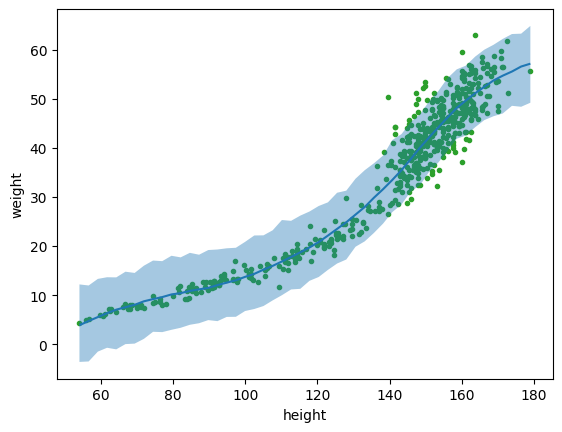

In [ ]:
bmb.interpret.plot_predictions(hw_spline, idata_spline, "height", pps=True)
plt.plot(height, weight, 'C2.', zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

**Answer6**:

One thing I learned about (GPs) from the article is that they can model uncertainty in input locations by placing a prior distribution over the observation dates. This accounts for measurement uncertainty and ensures a strict ordering of data points when necessary.   ( i think thats what they were talking about.........)

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

**Answer7**:

My favorite graph from the article is the one that shows the Gaussian Process regression over time, with the predicted mean and uncertainty bands. I like it because it shows how GPs not only make predictions but also show how uncertain they are. The shaded areas around the line help you see how confident the model is, making it really easy to understand where it’s more or less certain about its predictions.